In [21]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [22]:
random.seed(1852026)

In [23]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [24]:
def initializeParams(N=5):
    n=2
    n_y=1
    W = np.random.randn(N,n) 
    bias = np.random.randn(N,1) 
    V = np.random.randn(n_y,N) 
    a=pd.DataFrame(V.T)
    a[2]=W[:,0]
    a[3]=W[:,1]
    a[4]=bias
    omega=np.matrix(a)
    
 
   
    return W,bias,V,omega

In [25]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [26]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [27]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])


n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 10 # size of the hidden layer, # neurons, this is just for the moment to have some example

In [28]:
df.head()

,x1,x2,y
0,-1.262271,0.746859,0.461002
1,-0.804355,0.937081,0.617336
2,-1.805674,0.738389,-0.053984
3,-0.888805,0.061711,1.943678
4,-1.667562,-0.534543,2.127070


# Question 1. (Full minimization)

### MLP network

In [29]:
W,bias,V,omega=initializeParams()
ro=10**-5 #10-5 unti, 10-3
sigma=1
N=5

In [30]:
print(V,'\n')
print(W,'\n')
print(bias)

[[ 1.85479714 -0.55572651 -0.79000851  0.43181598  2.74275776]] 

[[ 0.62169367 -0.97416656]
 [-1.50498213 -0.84472802]
 [ 0.0263998   0.19827953]
 [ 0.38785478  1.56604711]
 [ 0.59569571  0.61769643]] 

[[ 1.2066351 ]
 [ 2.11237712]
 [ 0.95356055]
 [-0.81274024]
 [-0.61410775]]


In [31]:
class MLP(object):
    
    def __init__(self, ro,sigma):
        self.ro = ro
        self.sigma = sigma 

        
    def second_norm(self,omega):
        return np.linalg.norm(omega)**2   #,2)#**2

    def activation_f(self,t,sigma=1):
        return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)

    def predict(self,omega,X):  

        #params=
        r=omega.flatten().shape[0]
        try:
            c=omega.flatten().shape[1]

            N=int(omega.shape[1]/4)

        except:
                N=int(omega.shape[0]/4)
        V=omega.T[:N].reshape(1,N)
        W=omega.T[N:N+2*N].reshape(N,2)

        bias=omega.T[N+2*N:].reshape(N,1)

        t=W.dot(X)-bias


        predicted_values=V.dot(self.activation_f(t,sigma))
        return predicted_values#, W,bias




    def reg_tr_error(self,omega,functionArgs):
        X=functionArgs[0]
        true=functionArgs[1]

        r=omega.flatten().shape[0]
        try:
            c=omega.flatten().shape[1]

            N=int(omega.shape[1]/4)

        except:
                N=int(omega.shape[0]/4)

        predicted=self.predict(omega,X)


        err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
        err_all=err.dot(err.T)


        P=X.shape[1]
        return ((err_all)/(2*P)+ro*self.second_norm(omega)).item(0)

In [32]:
mlp=MLP(ro,sigma)
mlp.reg_tr_error(omega.flatten(),[X_train,Y_train])

1.661997273667135

In [33]:
omega

matrix([[ 1.85479714,  0.62169367, -0.97416656,  1.2066351 ],
        [-0.55572651, -1.50498213, -0.84472802,  2.11237712],
        [-0.79000851,  0.0263998 ,  0.19827953,  0.95356055],
        [ 0.43181598,  0.38785478,  1.56604711, -0.81274024],
        [ 2.74275776,  0.59569571,  0.61769643, -0.61410775]])

In [34]:
z=omega.flatten()
z.flatten().shape

(1, 20)

In [35]:
mlp.reg_tr_error(omega.flatten(),[X_train,Y_train])

1.661997273667135

In [36]:
res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
print(res['fun'],'\n',res['x'])

0.06564522460254087 
 [  0.55379453   3.88496451 -10.51718386   4.28288882  -6.275775
  -4.39091049   1.39235545   1.82051067   0.0293235    0.44347813
  -0.317517     3.12207864   0.24865069  -0.15343781   0.4412107
   2.39264761   1.20703723   0.6354378    6.4489726    0.31737487]


In [38]:
print(mlp.reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(mlp.reg_tr_error(res['x'].flatten(),[X_test,Y_test,N]))

0.08341076917300883
0.11605401731310197


$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [ ]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed


#repeated CROSS Validation

In [57]:
def second_norm_jac(omega): 
    return np.linalg.norm(omega)

def mse(true,predicted):
    return (np.sum(np.array(true-predicted)**2))/true.shape[1]


def calculate_test_err(cv_data,neurons,rho,sigma,omega):
    err=[]
    Mlp=MLP(rho,sigma)
    for i in range(10):
        X_train = np.transpose(np.matrix(cv_data)[:,0:2])
        Y_train = np.transpose(np.matrix(cv_data)[:,2:])
        #train on data train and data validate
        res=minimize(Mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train,N],method='L-BFGS-B')
        omega=res['x']
        #test on test data
        err.append(mse(Y_test,Mlp.predict(omega.flatten(),X_test)))
    return np.mean(err)

In [58]:
def fivefoldCV(params):
    '''
    params a list N,rho,sigma
    '''
    global X_train, X_validate, X_test, Y_train, Y_validate, Y_test 

    K=5   # SO 4 folds for training 1-validation for testing; they switch every time
    cv_data=np.concatenate((data_train,data_validate))
    np.random.shuffle(cv_data)
    indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
    folds=[]



    X=X_train

    true=Y_train

    N=params[0]
    rho=params[1]#10**-5 #10-5 unti, 10-3
    sigma=params[2]#1

    W,bias,V,omega=initializeParams(N)

    mlp=MLP(rho,sigma)

    P=cv_data.shape[0]



    val_err_mse=[]
    train_err_mse=[]
    fun=[]
    jac_norm=[]

    #train_err={}
    #val_err={}

    data=cv_data.copy()


    res_df=pd.DataFrame(columns=['neurons','rho','sigma','fun','err_tr','jac_norm','err_val','err_test'])
    for i in range(len(indices)):
        cv_data=data
        if i<4:
            l=[i for i in range(indices[i],indices[i+1])]
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:indices[i+1],:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])



            X_train = np.transpose(np.matrix(train_cv)[:,0:2])
            Y_train = np.transpose(np.matrix(train_cv)[:,2:])
            X_validate = np.transpose(validate_cv[:,0:2])
            Y_validate = np.transpose(validate_cv[:,2:])



            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            omega=res['x']
            fun.append(res['fun'])
          
         #   err_tr=Y_train,predict(omega.flatten(),X_train)
            jac_norm.append(second_norm_jac(res['jac'].T))

        #    err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_tr=mse(Y_train,mlp.predict(omega.flatten(),X_train))
            err_val=mse(Y_validate,mlp.predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)
            
             
           # train_err_dict[i]=
          #  val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))


        else:
            #for the last element
            l=list([i for i in range(indices[i],255)])
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:,:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])

            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            omega=res['x']
            fun.append(res['fun'])
            jac_norm.append(second_norm_jac(res['jac'].T))



            err_tr=mse(Y_train,mlp.predict(omega.flatten(),X_train))
       #     err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_val=mse(Y_validate,mlp.predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)

      #      train_err_dict_mse[i]=mse(Y_train,predict(omega.flatten(),X_train))
       #     val_err_dict_mse[i]=mse(Y_validate,predict(omega,X_validate))

    err_test=calculate_test_err(cv_data,N,rho,sigma,omega)
    res_df=res_df.append({'neurons':N,'rho':rho,'sigma':sigma,'fun':np.mean(fun),\
                              'err_tr':np.mean(train_err_mse),'jac_norm':np.mean(jac_norm),\
                              'err_val':np.mean(val_err_mse),'err_test':err_test},ignore_index=True )
    return res_df

In [59]:
fivefoldCV([3,0.0001,1])

,neurons,rho,sigma,fun,err_tr,jac_norm,err_val,err_test
0,3.0,0.0001,1.0,0.132067,0.262227,0.000315,0.322729,0.300177


In [60]:
neurons_count=[3,6,7,9,11,20]
rho_values=[0.001,0.00001]
sigma_vals=[1,1.5]

all_poss_conf=[]
for i in neurons_count:
    for r in rho_values:
        for s in sigma_vals:
            all_poss_conf.append((i,r,s))

In [61]:
from tqdm import tqdm
res_df=pd.DataFrame()
for conf in tqdm(all_poss_conf):
    res_df=res_df.append(fivefoldCV(conf))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [05:00<00:00, 26.07s/it]


In [62]:
res_df

,neurons,rho,sigma,fun,err_tr,jac_norm,err_val,err_test
0,3.0,0.00100,1.0,0.133422,0.265070,0.000152,0.304558,0.300352
0,3.0,0.00100,1.5,0.108360,0.210763,0.000467,0.315260,0.365053
0,3.0,0.00001,1.0,0.116435,0.229737,0.000260,0.259986,0.355852
0,3.0,0.00001,1.5,0.117721,0.229098,0.000371,0.234917,0.364241
0,6.0,0.00100,1.0,0.040897,0.073545,0.005532,0.103756,0.133232
0,6.0,0.00100,1.5,0.021944,0.035974,0.003940,0.057706,0.050382
0,6.0,0.00001,1.0,0.030544,0.054399,0.007349,0.077860,0.095191
0,6.0,0.00001,1.5,0.038265,0.070950,0.009354,0.102103,0.084587
0,7.0,0.00100,1.0,0.024658,0.045069,0.000902,0.065821,0.106750
0,7.0,0.00100,1.5,0.041592,0.076231,0.012930,0.087248,0.127807


In [75]:
 omega

matrix([[ 1.85479714,  0.62169367, -0.97416656,  1.2066351 ],
        [-0.55572651, -1.50498213, -0.84472802,  2.11237712],
        [-0.79000851,  0.0263998 ,  0.19827953,  0.95356055],
        [ 0.43181598,  0.38785478,  1.56604711, -0.81274024],
        [ 2.74275776,  0.59569571,  0.61769643, -0.61410775]])

In [63]:
res_df.to_csv('cv_results.csv')

In [76]:
def plotting(): 
    
    
    rho=all_poss_conf[-2][1]
    sigma=all_poss_conf[-2][2]
    mlp=MLP(rho,sigma)
    
    fig = plt.figure(figsize=(40,30))
    ax = plt.axes(projection='3d')

    res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
    
    omega2=res['x']
    xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T

    
    Z = mlp.predict(omega2,XY.T)
    Z=Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
#    fig.savefig('results_11_MLP')
    plt.grid()
    return X.shape,Y.shape,Z.shape,X,Y,Z.T
 

((3321,),
 (3321,),
 (3321,),
 array([-2., -2., -2., ...,  2.,  2.,  2.]),
 array([-1.  , -0.95, -0.9 , ...,  0.9 ,  0.95,  1.  ]),
 array([3.92392706, 3.86734475, 3.80635707, ..., 5.02764309, 5.09440156,
        5.15872396]))

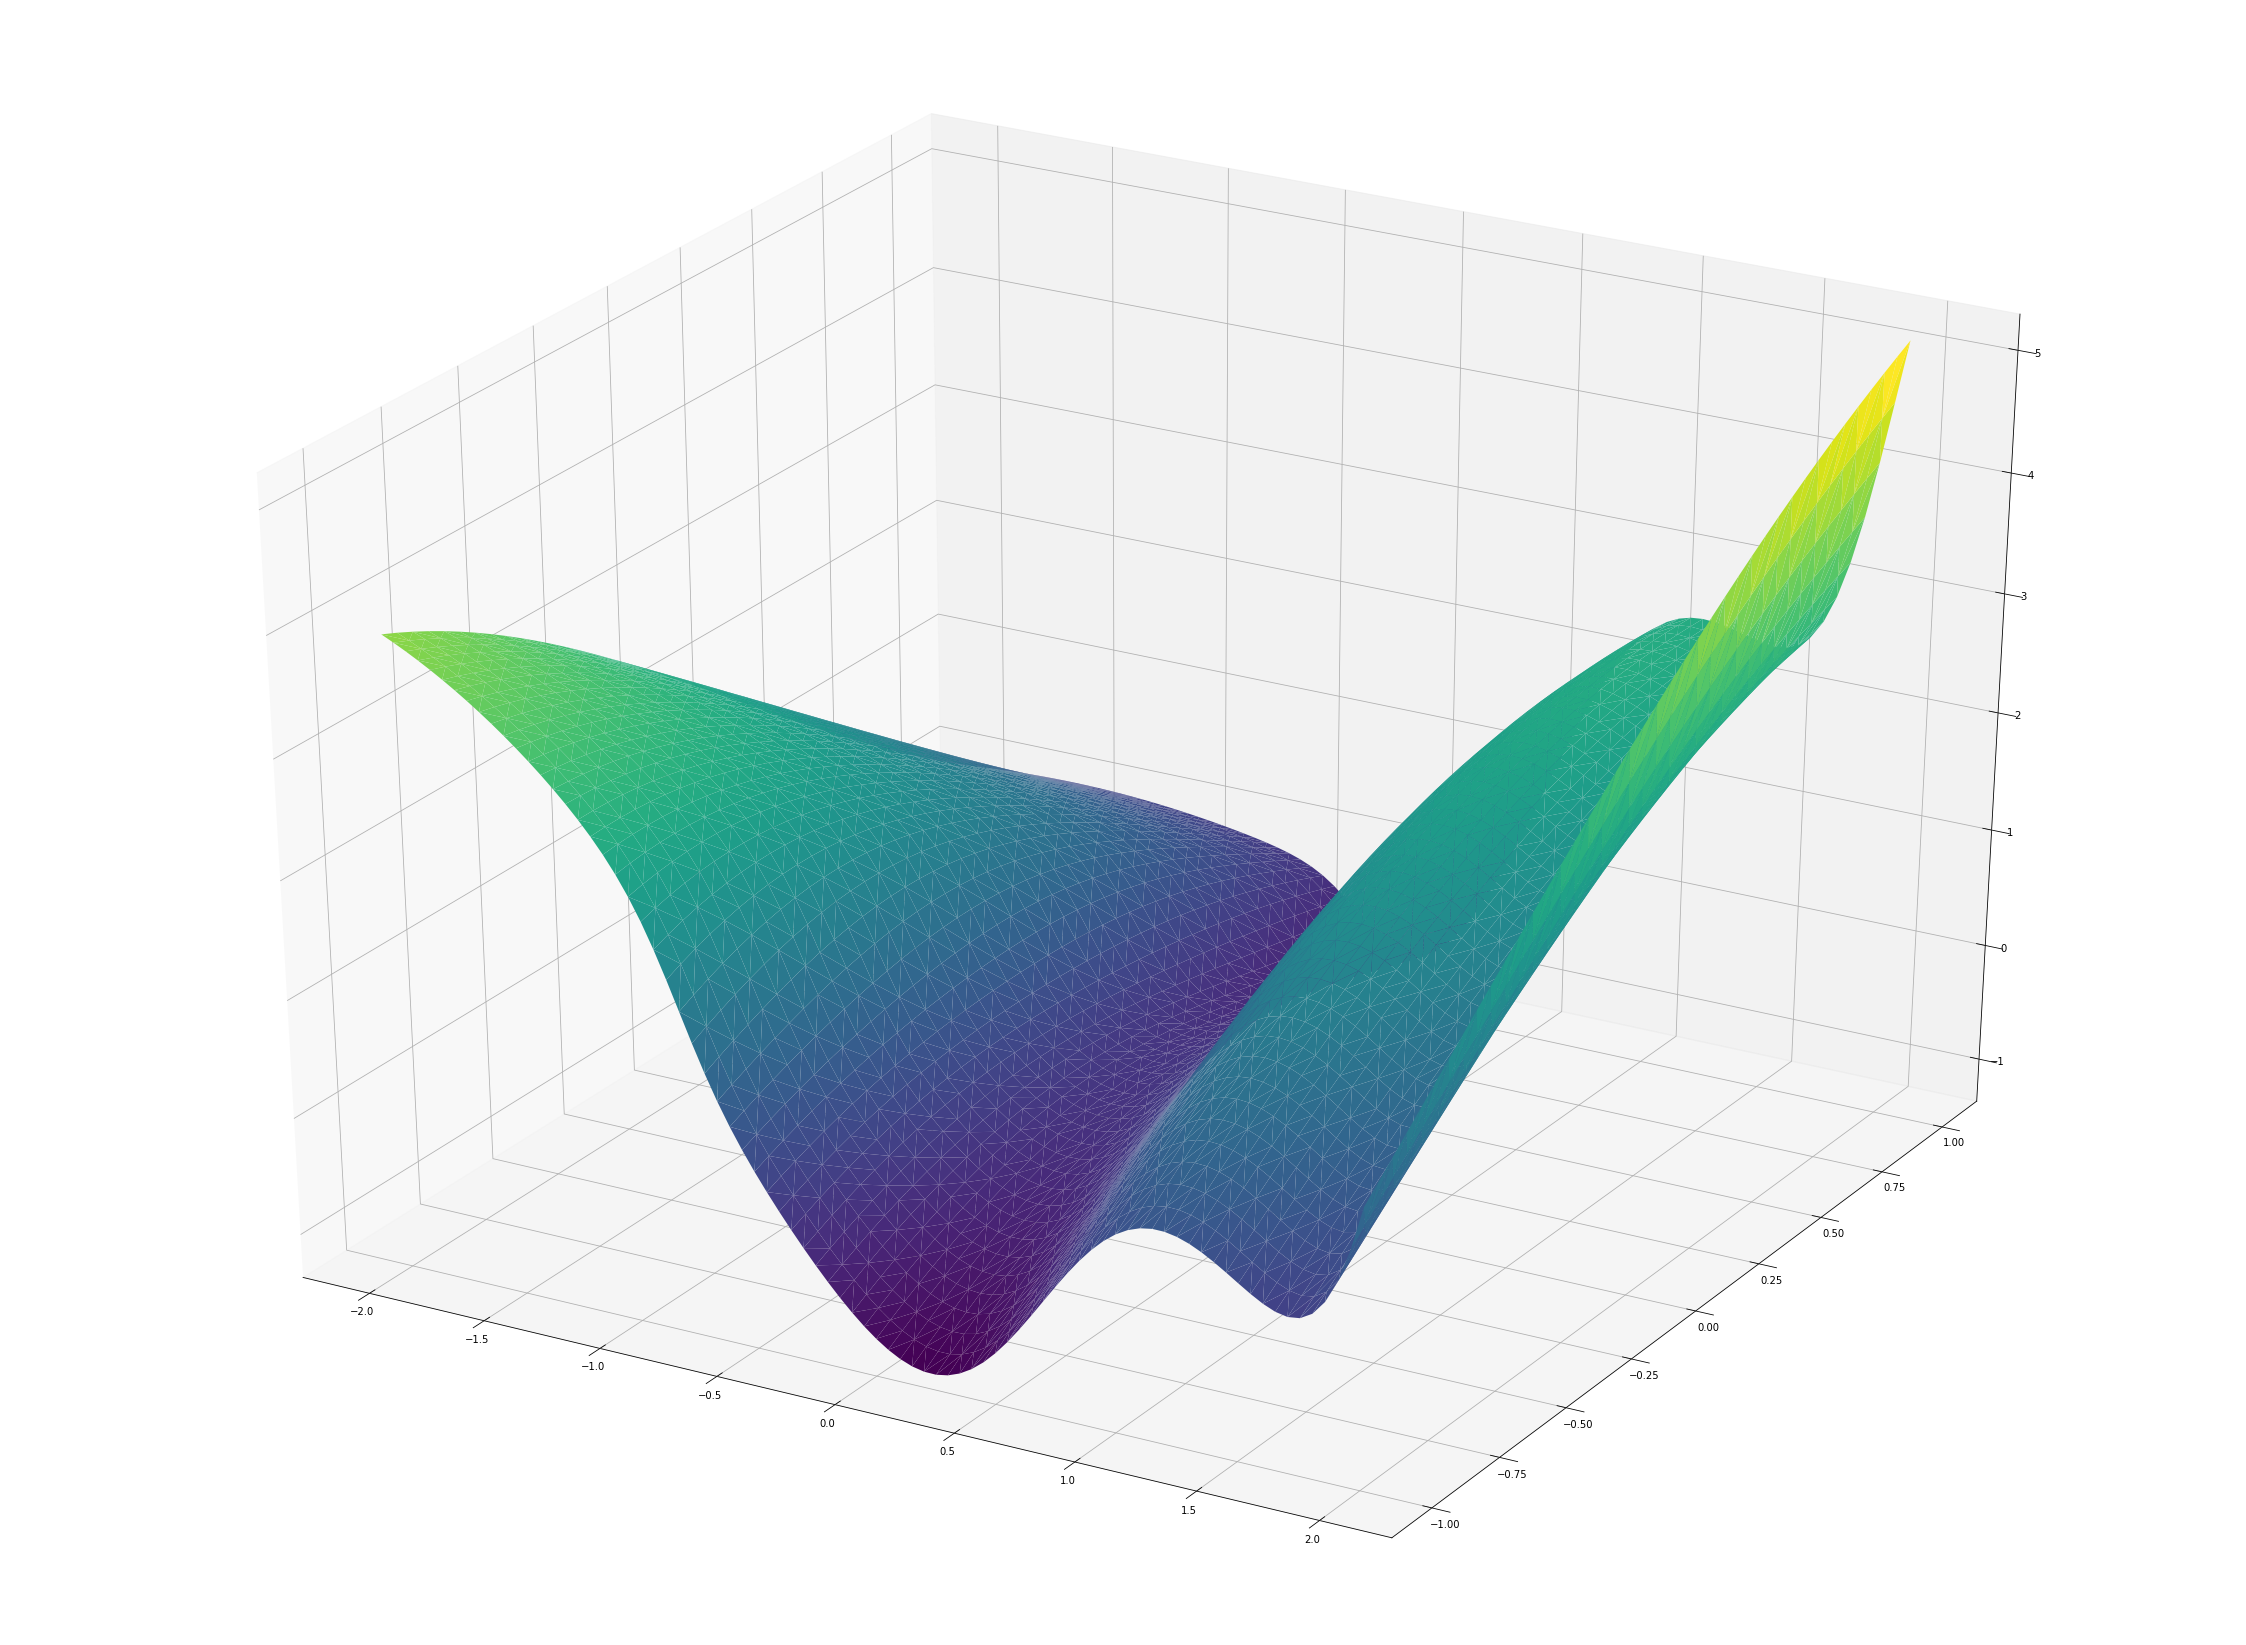

In [77]:
plotting()

In [ ]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 

In [ ]:
#average rmse
print('!-----------V--A-L--I--D--A--T--I---O--N------R-M-S-E----!')
#print(sum(val_err_dict.values())/len(val_err_dict))

print('!---------------T---R---A----I---N----------R-M-S-E------!')
#print(sum(train_err_dict.values())/len(train_err_dict))